# Import Libraries

In [26]:
import sklearn
print(sklearn.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1.6.1


# Load Data

In [27]:
df = pd.read_csv(r"D:\MY PROJECTS\PANDAS_1\IDEALIZE\Dataset\test.csv")

# LETS START PREPROCESSING DATA!

## calculating missing 

In [28]:
total = len(df)

percent_missing = (df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': df.columns,
    'missing_percentage': percent_missing.round(2)
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='missing_percentage', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage
Sunshine,Sunshine,47.37%
Evaporation,Evaporation,42.72%
Cloud3pm,Cloud3pm,40.17%
Cloud9am,Cloud9am,37.91%
Pressure9am,Pressure9am,9.59%
Pressure3pm,Pressure3pm,9.56%
WindDir9am,WindDir9am,6.88%
WindGustDir,WindGustDir,6.49%
WindGustSpeed,WindGustSpeed,6.43%
Humidity3pm,Humidity3pm,2.51%


## visually representing Missing values

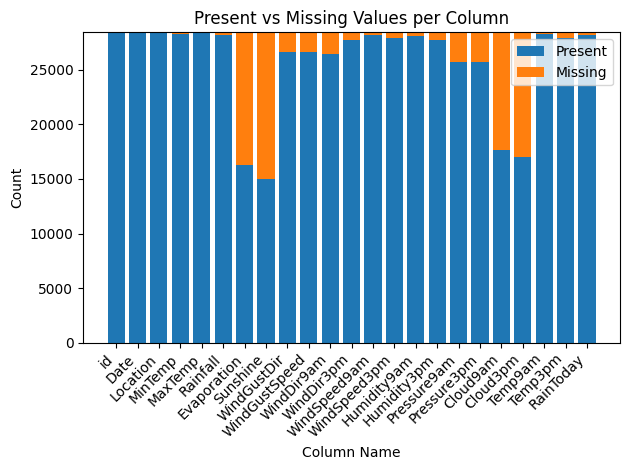

In [29]:
import matplotlib.pyplot as plt

present = df.notnull().sum()
missing = df.isnull().sum()

plt.bar(df.columns, present, label='Present')
plt.bar(df.columns, missing, bottom=present, label='Missing')
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title('Present vs Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## drop colomns

In [30]:
preprocessed_df = df.copy()

In [31]:
cols_to_drop = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count / len(df) > 0.35:
        cols_to_drop.append(col)

preprocessed_df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

        

Dropped columns: ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


## thinking what to do with other missing values

In [32]:
total = len(preprocessed_df)

percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2),
    'Data Type': preprocessed_df.dtypes
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='Data Type', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage,Data Type
WindDir3pm,WindDir3pm,2.5%,object
WindGustDir,WindGustDir,6.49%,object
Date,Date,0.0%,object
WindDir9am,WindDir9am,6.88%,object
RainToday,RainToday,0.97%,object
Location,Location,0.0%,object
Rainfall,Rainfall,0.97%,float64
MaxTemp,MaxTemp,0.23%,float64
WindGustSpeed,WindGustSpeed,6.43%,float64
MinTemp,MinTemp,0.44%,float64


## handle missing values


In [33]:
for col in preprocessed_df.columns:
    if preprocessed_df[col].dtype in ['int64', 'float64']:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mean())
    else:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mode()[0])


## check after adding missing values

In [34]:
total=len(preprocessed_df)

preprocessed_df.isnull().sum()
percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2).astype(str) + '%'
})

missing_stats

,Column Name,missing_percentage
id,id,0.0%
Date,Date,0.0%
Location,Location,0.0%
MinTemp,MinTemp,0.0%
MaxTemp,MaxTemp,0.0%
Rainfall,Rainfall,0.0%
WindGustDir,WindGustDir,0.0%
WindGustSpeed,WindGustSpeed,0.0%
WindDir9am,WindDir9am,0.0%
WindDir3pm,WindDir3pm,0.0%


## split or join columns

In [35]:
#SPLIT Date INTO sub-columns: Month and Year
preprocessed_df[['Year','Month','Day']] = preprocessed_df['Date'].str.split('-', expand=True)


#drop the original Date column
preprocessed_df = preprocessed_df.drop(['Date'], axis=1)


## Encoding

*only qualititive data will be encoded*

In [36]:
from sklearn.preprocessing import OneHotEncoder

## getting unique count of coloms to decide encoding techiques

In [37]:

unique_count=pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'Unique Count': [preprocessed_df[col].nunique() for col in preprocessed_df.columns],
    'data_type': [preprocessed_df[col].dtype for col in preprocessed_df.columns]
})


unique_count = unique_count.sort_values(by='data_type', ascending=False)
unique_count

,Column Name,Unique Count,data_type
20,Day,11,object
19,Month,12,object
18,Year,31,object
17,RainToday,2,object
5,WindGustDir,16,object
7,WindDir9am,16,object
8,WindDir3pm,16,object
1,Location,49,object
13,Pressure9am,486,float64
16,Temp3pm,444,float64


## check what are the unique Values

In [38]:
var = preprocessed_df["Year"].unique()
var = sorted(var)
print(var)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


# ML works better with Numbers

### converting some other data types to int

In [39]:
preprocessed_df['Year']=preprocessed_df['Year'].astype(int)
preprocessed_df['Month']=preprocessed_df['Month'].astype(int)


### ONE hot encoding for Qualitative Data

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
cols_to_encode = ['RainToday']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(preprocessed_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

preprocessed_df.drop(cols_to_encode, axis=1, inplace=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)



### some qualitative columns has more values that it cannot be one hot encoded.So we do TARGET ENCODING

In [42]:
# # Print the 'Location' value for row numbers 53715 and 78442
# print(preprocessed_df.loc[53715, 'Location'])
# print(preprocessed_df.loc[78442, 'Location'])

In [43]:
import json

cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
encoding_dicts = {}

for col in cols_to_encode:
    with open(f"encoding_dict_{col}.json", "r") as f:
        encoding_dicts[col] = json.load(f)

# Now you can map your test data columns using these loaded dictionaries
for col in cols_to_encode:
    preprocessed_df[col] = preprocessed_df[col].map(encoding_dicts[col])
    
    # Fill missing values if any (categories not seen in training)
    mean_encoding = sum(encoding_dicts[col].values()) / len(encoding_dicts[col])
    preprocessed_df[col] = preprocessed_df[col].fillna(mean_encoding)


In [44]:
preprocessed_df.head(12)

,id,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
0,113754,0.185252,15.1,32.9,0.0,0.152037,50.00000,0.146406,0.254351,7.0,...,73.0,32.0,1015.5,1011.8,19.0,30.3,26,1,17,0.0
1,113755,0.300999,8.4,16.2,0.0,0.234448,46.00000,0.306906,0.254351,28.0,...,45.0,74.0,1011.3,1011.9,13.7,14.6,12,9,12,0.0
2,113756,0.203377,17.0,24.7,0.0,0.205032,39.00000,0.199068,0.226185,13.0,...,56.0,57.0,1007.1,1003.7,21.4,24.2,6,11,15,0.0
3,113757,0.129087,12.3,18.8,0.0,0.234448,39.00000,0.230641,0.254351,19.0,...,51.0,29.0,1017.7,1015.6,12.9,18.0,24,4,12,0.0
4,113758,0.196314,1.1,18.3,0.2,0.271224,13.00000,0.306906,0.244337,0.0,...,100.0,49.0,1029.5,1025.5,7.1,17.9,28,7,11,0.0
5,113759,0.177189,-3.2,14.1,0.0,0.234448,15.00000,0.208486,0.187714,4.0,...,85.0,52.0,1032.7,1030.6,3.6,13.1,22,7,10,0.0
6,113760,0.256269,17.5,34.2,0.0,0.234448,67.00000,0.309543,0.280539,15.0,...,43.0,15.0,1008.2,1001.3,24.1,33.2,1,11,12,0.0
7,113761,0.238301,5.9,10.4,0.4,0.205032,46.00000,0.245569,0.198091,20.0,...,57.0,47.0,1021.6,1022.1,8.1,10.4,12,6,10,0.0
8,113762,0.080132,14.9,39.1,0.0,0.163055,44.00000,0.230641,0.215530,7.0,...,6.0,3.0,1014.8,1010.3,31.6,37.7,16,10,15,0.0
9,113763,0.200249,9.4,31.1,0.0,0.271224,33.00000,0.208486,0.278537,9.0,...,24.0,7.0,1017.2,1011.5,21.0,29.9,20,3,13,0.0


### analyzing

In [45]:
print(preprocessed_df['RainToday_Yes'].value_counts())

RainToday_Yes
0.0    22119
1.0     6320
Name: count, dtype: int64


# Scaling

*scaling is for numerical features only*

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
target_column = 'RainTomorrow'

columns_to_scale = []

for column in preprocessed_df.columns:
    if column != target_column and preprocessed_df[column].dtype != 'object':
        columns_to_scale.append(column)

scaler = StandardScaler()

preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])


In [48]:
preprocessed_df.sample(20)

,id,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
4575,-1.174718,0.598028,-0.194525,0.034024,-0.284728,0.966213,0.000000,1.364097,1.411446,0.883634,...,-1.155398,-1.482541,-0.270390,-0.872653,-0.252504,0.214267,-0.991863,0.469426,09,-0.534535
25983,1.432951,0.306339,0.965978,0.315722,-0.284728,-0.892111,0.294747,-0.423424,-0.844527,-0.790419,...,0.588393,1.102819,0.809944,0.770981,0.771119,0.403897,-1.105600,-0.983083,16,-0.534535
14396,0.021560,0.694097,0.464139,0.357976,0.776775,1.074265,-0.235180,0.554242,-1.082746,-0.790419,...,-0.521292,-0.067910,-0.092801,0.083643,0.305836,0.185093,0.145512,-0.983083,14,1.870786
25564,1.381913,0.215281,-0.414080,-1.064599,1.739534,-0.114584,0.219043,-0.177461,-0.151725,0.548824,...,0.059972,0.175992,0.351172,0.546849,-0.810845,-1.083968,0.714200,-0.983083,14,1.870786
9340,-0.594302,0.598028,1.326675,0.217127,4.380951,-0.924292,1.733123,-0.590009,-0.831701,-0.902023,...,1.063973,1.639403,-0.107600,0.113527,0.724591,0.068398,-1.446813,-0.983083,17,1.870786
17892,0.447401,-0.371588,-0.210208,-0.994174,-0.284728,-0.924292,0.219043,-1.521511,-1.211937,1.106842,...,0.852604,-0.799616,1.224318,1.338782,-0.609222,-0.865164,-1.333075,-0.402079,13,-0.534535
26145,1.452684,1.182261,-1.339346,-1.571655,0.060877,-0.665808,-0.386588,-0.995967,-1.262450,-0.567212,...,0.958288,0.858917,0.528761,0.800865,-1.415713,-1.521575,0.259250,-0.111577,16,1.870786
9479,-0.577371,-0.781594,1.687372,1.160816,-0.235356,-0.892111,-0.537996,0.853179,1.430116,0.660427,...,0.429867,0.322333,-0.921549,-1.141611,1.531082,1.118655,0.259250,1.340932,12,-0.534535
13796,-0.051525,-2.271660,0.338679,0.357976,-0.284728,0.079544,-0.083773,-0.995967,-1.262450,0.102409,...,-0.362766,-0.458153,0.217980,-0.020952,0.367874,0.535179,0.145512,-0.692581,15,-0.534535
7569,-0.810024,0.750913,0.636646,1.386174,-0.284728,-0.114584,1.203195,1.364097,-1.082746,-0.344005,...,0.694078,-0.311812,-0.803157,-1.037017,0.802138,1.337459,0.941675,-0.983083,15,-0.534535


## To Pickle

In [49]:
preprocessed_df.to_pickle("idealize_1_test.pkl")

In [50]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28439 entries, 0 to 28438
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28439 non-null  float64
 1   Location       28439 non-null  float64
 2   MinTemp        28439 non-null  float64
 3   MaxTemp        28439 non-null  float64
 4   Rainfall       28439 non-null  float64
 5   WindGustDir    28439 non-null  float64
 6   WindGustSpeed  28439 non-null  float64
 7   WindDir9am     28439 non-null  float64
 8   WindDir3pm     28439 non-null  float64
 9   WindSpeed9am   28439 non-null  float64
 10  WindSpeed3pm   28439 non-null  float64
 11  Humidity9am    28439 non-null  float64
 12  Humidity3pm    28439 non-null  float64
 13  Pressure9am    28439 non-null  float64
 14  Pressure3pm    28439 non-null  float64
 15  Temp9am        28439 non-null  float64
 16  Temp3pm        28439 non-null  float64
 17  Year           28439 non-null  float64
 18  Month 